<a href="https://colab.research.google.com/github/pierce-s/MAT-421/blob/main/Land_Boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Pierce Sarmiento

First step: Allow google colab to pull shape files from my drive, and set the path to the shape file in the google drive:

In [19]:
from google.colab import drive
drive.mount('/content/drive')

# shapefile from https://gadm.org/download_country.html
shapefile_path = '/content/drive/MyDrive/Sea Turtle Macroplastics/gadm41_TTO_0.shp'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Print GDF to see the data structure. It seems there is a country code, a country name, and a multipolygon. The polygon contains coordinates of the land boundary.

In [21]:
import geopandas as gpd

# load shapefile
gdf = gpd.read_file(shapefile_path)

# inspect the data
print(gdf.head())


  GID_0              COUNTRY  \
0   TTO  Trinidad and Tobago   

                                            geometry  
0  MULTIPOLYGON (((-61.50605 10.07154, -61.50625 ...  


Since we have the coordinates, we essentially just need to graph, so we will use matplotlib.

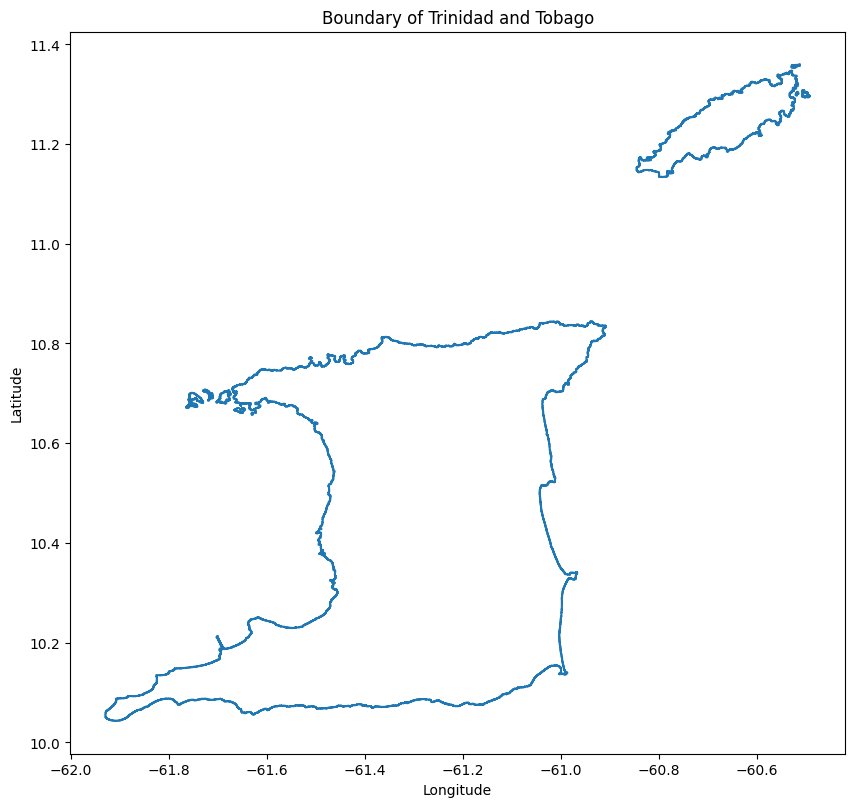

In [22]:
import matplotlib.pyplot as plt

f = gpd.read_file(shapefile_path)

# extract the coordinates for the boundary
boundary = gdf.geometry.iloc[0]

# plot the coordinates using matplotlib
fig, ax = plt.subplots(figsize=(10, 10))
gdf.boundary.plot(ax=ax)

plt.title("Boundary of Trinidad and Tobago")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


It seems the coordinates give multiple polygons, but we are only interested in Trinidad coordinates. Upon inspection, the first polygon is Trinidad, so we isolate that geometry and turn it into its own GDF (GeoDataFrame), then plot.


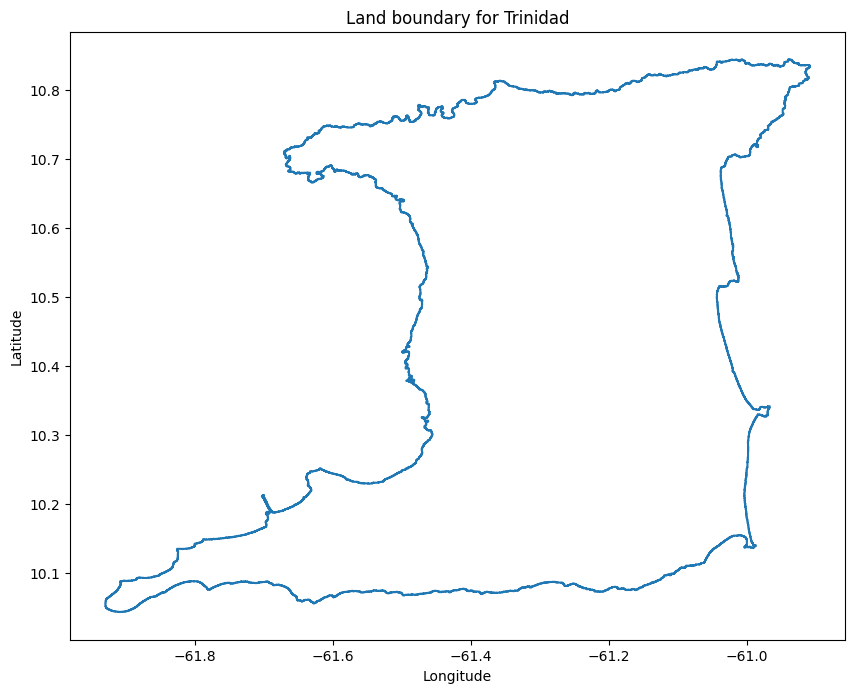

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt

# load in shapefile using geopandas
gdf = gpd.read_file(shapefile_path)

# grab polygon coordinates from first polygon (Trinidad)
trinidad_polygon = gdf.geometry.iloc[0].geoms[0]

# create a new gpd to isolate Trinidad polygon
trinidad_gdf = gpd.GeoDataFrame(geometry=[trinidad_polygon])

# plot land boundaries
fig, ax = plt.subplots(figsize=(10, 10))
trinidad_gdf.boundary.plot(ax=ax)

plt.title("Land boundary for Trinidad")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


And we are done for now. We have a way to represent the coordinates in 2D space. For any simulation going forward, we can create a 2D grid using the pygame library, and simply map these coordinates onto that grid.